# Automating Coinmarketcap  API Pull and Analysis

In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '7a776009-d0a9-4bab-92fe-6cf08f64e7df',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-08-28T14:00:04.763Z', 'error_code': 0, 'error_message': None, 'elapsed': 18, 'credit_count': 1, 'notice': None, 'total_count': 9614}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9708, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'parad

Reading the Data

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [4]:
MarketCap = pd.json_normalize(data["data"])
MarketCap.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9708,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.913466e+07,1.913466e+07,NaN,1,None,None,None,2022-08-28T13:57:00.000Z,19970.125160,2.548244e+10,-35.8096,-0.016304,-1.220408,-6.746205,-15.772380,-0.551487,-34.462498,3.821216e+11,39.6271,4.193726e+11,None,2022-08-28T13:57:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,6052,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.221444e+08,1.221444e+08,NaN,2,None,None,None,2022-08-28T13:57:00.000Z,1476.078127,1.418317e+10,-42.2895,0.081309,-1.857364,-8.621265,-13.183300,33.079349,-21.830146,1.802947e+11,18.6988,1.802947e+11,None,2022-08-28T13:57:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,38957,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.754966e+10,6.915678e+10,NaN,3,None,None,None,2022-08-28T13:57:00.000Z,1.000006,3.568214e+10,-38.3200,-0.000302,-0.006088,-0.001891,-0.023580,0.122792,0.065204,6.755008e+10,7.0053,6.915721e+10,None,2022-08-28T13:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,3408,USD Coin,USDC,usd-coin,5990,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.221559e+10,5.221559e+10,NaN,4,None,None,None,2022-08-28T13:57:00.000Z,0.999979,6.603077e+09,-25.3037,0.000730,-0.007520,-0.003234,-0.001235,-0.041693,-0.011193,5.221451e+10,5.4148,5.221451e+10,None,2022-08-28T13:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
4,1839,BNB,BNB,bnb,1088,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",200000000.0,1.613373e+08,1.613373e+08,NaN,5,None,None,None,2022-08-28T13:57:00.000Z,278.931116,8.372292e+08,-27.2110,0.426461,-1.674672,-5.689015,-3.009317,27.966958,-10.813478,4.500198e+10,4.6669,5.578622e+10,None,2022-08-28T13:57:00.000Z,NaN,NaN,NaN,NaN,NaN


Automation

In [5]:
#Creating Timestamp
Timestamp = pd.Timestamp("now")
Timestamp

#Inserting it to the dataframe
MarketCap.insert(loc = 6, column = "Timestamp", value = Timestamp)
MarketCap.head()

,id,name,symbol,slug,num_market_pairs,date_added,Timestamp,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9708,2013-04-28T00:00:00.000Z,2022-08-28 15:00:37.019522,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.913466e+07,1.913466e+07,NaN,1,None,None,None,2022-08-28T13:57:00.000Z,19970.125160,2.548244e+10,-35.8096,-0.016304,-1.220408,-6.746205,-15.772380,-0.551487,-34.462498,3.821216e+11,39.6271,4.193726e+11,None,2022-08-28T13:57:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,6052,2015-08-07T00:00:00.000Z,2022-08-28 15:00:37.019522,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.221444e+08,1.221444e+08,NaN,2,None,None,None,2022-08-28T13:57:00.000Z,1476.078127,1.418317e+10,-42.2895,0.081309,-1.857364,-8.621265,-13.183300,33.079349,-21.830146,1.802947e+11,18.6988,1.802947e+11,None,2022-08-28T13:57:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,38957,2015-02-25T00:00:00.000Z,2022-08-28 15:00:37.019522,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.754966e+10,6.915678e+10,NaN,3,None,None,None,2022-08-28T13:57:00.000Z,1.000006,3.568214e+10,-38.3200,-0.000302,-0.006088,-0.001891,-0.023580,0.122792,0.065204,6.755008e+10,7.0053,6.915721e+10,None,2022-08-28T13:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,3408,USD Coin,USDC,usd-coin,5990,2018-10-08T00:00:00.000Z,2022-08-28 15:00:37.019522,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.221559e+10,5.221559e+10,NaN,4,None,None,None,2022-08-28T13:57:00.000Z,0.999979,6.603077e+09,-25.3037,0.000730,-0.007520,-0.003234,-0.001235,-0.041693,-0.011193,5.221451e+10,5.4148,5.221451e+10,None,2022-08-28T13:57:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
4,1839,BNB,BNB,bnb,1088,2017-07-25T00:00:00.000Z,2022-08-28 15:00:37.019522,"[marketplace, centralized-exchange, payments, ...",200000000.0,1.613373e+08,1.613373e+08,NaN,5,None,None,None,2022-08-28T13:57:00.000Z,278.931116,8.372292e+08,-27.2110,0.426461,-1.674672,-5.689015,-3.009317,27.966958,-10.813478,4.500198e+10,4.6669,5.578622e+10,None,2022-08-28T13:57:00.000Z,NaN,NaN,NaN,NaN,NaN


In [6]:
def api_runner():
    global MarketCap
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '7a776009-d0a9-4bab-92fe-6cf08f64e7df',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    MarketCap = pd.json_normalize(data["data"])
    Timestamp = pd.Timestamp("now")
    MarketCap.insert(loc = 6, column = "Timestamp", value = Timestamp)
    MarketCap
    
#Creating  csv and appending data to it
    if not os.path.isfile(r'C:\Users\lolad\Desktop\pandas\MarketCap.csv'):
        MarketCap.to_csv(r'C:\Users\lolad\Desktop\pandas\MarketCap.csv', header='column_names')
    else:
        MarketCap.to_csv(r'C:\Users\lolad\Desktop\pandas\MarketCap.csv', mode='a', header=False)

In [7]:
#This script automatically run the script above
import os 
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

Reading the CSV

In [9]:
CoinMarketCap = pd.read_csv(r"C:\Users\lolad\Desktop\pandas\MarketCap.csv")
CoinMarketCap.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,Timestamp,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,0,1,Bitcoin,BTC,bitcoin,9643,2013-04-28T00:00:00.000Z,2022-07-27 15:02:14.710242,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.910484e+07,1.910484e+07,NaN,1,NaN,NaN,NaN,2022-07-27T14:01:00.000Z,21463.802567,2.566648e+10,-34.8830,0.390031,2.433713,-9.848732,3.335480,-26.130180,-45.133112,4.100626e+11,41.3813,4.507399e+11,NaN,2022-07-27T14:01:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1,1027,Ethereum,ETH,ethereum,5866,2015-08-07T00:00:00.000Z,2022-07-27 15:02:14.710242,"['mineable', 'pow', 'smart-contracts', 'ethere...",NaN,1.217184e+08,1.217184e+08,NaN,2,NaN,NaN,NaN,2022-07-27T14:00:00.000Z,1490.462747,1.729549e+10,-14.1226,0.835911,7.321022,-6.549740,25.502998,-16.594146,-48.183652,1.814167e+11,18.3226,1.814167e+11,NaN,2022-07-27T14:00:00.000Z,NaN,NaN,NaN,NaN,NaN
2,2,825,Tether,USDT,tether,36691,2015-02-25T00:00:00.000Z,2022-07-27 15:02:14.710242,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,6.584628e+10,6.816698e+10,NaN,3,NaN,NaN,NaN,2022-07-27T14:00:00.000Z,1.000172,4.551715e+10,-24.1389,0.006037,0.008739,0.007515,0.094280,0.103893,0.010957,6.585763e+10,6.6460,6.817873e+10,NaN,2022-07-27T14:00:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,3,3408,USD Coin,USDC,usd-coin,4974,2018-10-08T00:00:00.000Z,2022-07-27 15:02:14.710242,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,5.511526e+10,5.511526e+10,NaN,4,NaN,NaN,NaN,2022-07-27T14:00:00.000Z,1.000087,6.456331e+09,-2.5051,0.017057,0.003298,0.003580,0.006188,-0.018113,0.032217,5.512004e+10,5.5638,5.512004e+10,NaN,2022-07-27T14:00:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
4,4,1839,BNB,BNB,bnb,1039,2017-07-25T00:00:00.000Z,2022-07-27 15:02:14.710242,"['marketplace', 'centralized-exchange', 'payme...",200000000.0,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,NaN,2022-07-27T14:00:00.000Z,258.970935,9.983985e+08,0.0102,0.893871,6.722130,-3.704203,11.521139,-15.094614,-35.127196,4.178166e+10,4.2151,5.179419e+10,NaN,2022-07-27T14:00:00.000Z,NaN,NaN,NaN,NaN,NaN


Cleaning Up the Data

In [10]:
#Droping the column tags
CoinMarketCap = CoinMarketCap.drop(columns = "tags")
CoinMarketCap.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,Timestamp,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,0,1,Bitcoin,BTC,bitcoin,9643,2013-04-28T00:00:00.000Z,2022-07-27 15:02:14.710242,21000000.0,1.910484e+07,1.910484e+07,NaN,1,NaN,NaN,NaN,2022-07-27T14:01:00.000Z,21463.802567,2.566648e+10,-34.8830,0.390031,2.433713,-9.848732,3.335480,-26.130180,-45.133112,4.100626e+11,41.3813,4.507399e+11,NaN,2022-07-27T14:01:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1,1027,Ethereum,ETH,ethereum,5866,2015-08-07T00:00:00.000Z,2022-07-27 15:02:14.710242,NaN,1.217184e+08,1.217184e+08,NaN,2,NaN,NaN,NaN,2022-07-27T14:00:00.000Z,1490.462747,1.729549e+10,-14.1226,0.835911,7.321022,-6.549740,25.502998,-16.594146,-48.183652,1.814167e+11,18.3226,1.814167e+11,NaN,2022-07-27T14:00:00.000Z,NaN,NaN,NaN,NaN,NaN
2,2,825,Tether,USDT,tether,36691,2015-02-25T00:00:00.000Z,2022-07-27 15:02:14.710242,NaN,6.584628e+10,6.816698e+10,NaN,3,NaN,NaN,NaN,2022-07-27T14:00:00.000Z,1.000172,4.551715e+10,-24.1389,0.006037,0.008739,0.007515,0.094280,0.103893,0.010957,6.585763e+10,6.6460,6.817873e+10,NaN,2022-07-27T14:00:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,3,3408,USD Coin,USDC,usd-coin,4974,2018-10-08T00:00:00.000Z,2022-07-27 15:02:14.710242,NaN,5.511526e+10,5.511526e+10,NaN,4,NaN,NaN,NaN,2022-07-27T14:00:00.000Z,1.000087,6.456331e+09,-2.5051,0.017057,0.003298,0.003580,0.006188,-0.018113,0.032217,5.512004e+10,5.5638,5.512004e+10,NaN,2022-07-27T14:00:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
4,4,1839,BNB,BNB,bnb,1039,2017-07-25T00:00:00.000Z,2022-07-27 15:02:14.710242,200000000.0,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,NaN,2022-07-27T14:00:00.000Z,258.970935,9.983985e+08,0.0102,0.893871,6.722130,-3.704203,11.521139,-15.094614,-35.127196,4.178166e+10,4.2151,5.179419e+10,NaN,2022-07-27T14:00:00.000Z,NaN,NaN,NaN,NaN,NaN


In [11]:
#Removing scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)
CoinMarketCap.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,Timestamp,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,0,1,Bitcoin,BTC,bitcoin,9643,2013-04-28T00:00:00.000Z,2022-07-27 15:02:14.710242,21000000.00000,19104843.00000,19104843.00000,NaN,1,NaN,NaN,NaN,2022-07-27T14:01:00.000Z,21463.80257,25666479304.22394,-34.88300,0.39003,2.43371,-9.84873,3.33548,-26.13018,-45.13311,410062578222.68201,41.38130,450739853903.87000,NaN,2022-07-27T14:01:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1,1027,Ethereum,ETH,ethereum,5866,2015-08-07T00:00:00.000Z,2022-07-27 15:02:14.710242,NaN,121718395.56150,121718395.56150,NaN,2,NaN,NaN,NaN,2022-07-27T14:00:00.000Z,1490.46275,17295487390.94204,-14.12260,0.83591,7.32102,-6.54974,25.50300,-16.59415,-48.18365,181416734176.00632,18.32260,181416734176.01001,NaN,2022-07-27T14:00:00.000Z,NaN,NaN,NaN,NaN,NaN
2,2,825,Tether,USDT,tether,36691,2015-02-25T00:00:00.000Z,2022-07-27 15:02:14.710242,NaN,65846277709.14964,68166976391.34196,NaN,3,NaN,NaN,NaN,2022-07-27T14:00:00.000Z,1.00017,45517145239.54194,-24.13890,0.00604,0.00874,0.00751,0.09428,0.10389,0.01096,65857632270.00073,6.64600,68178731134.49000,NaN,2022-07-27T14:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,3,3408,USD Coin,USDC,usd-coin,4974,2018-10-08T00:00:00.000Z,2022-07-27 15:02:14.710242,NaN,55115258249.09938,55115258249.09938,NaN,4,NaN,NaN,NaN,2022-07-27T14:00:00.000Z,1.00009,6456331470.64705,-2.50510,0.01706,0.00330,0.00358,0.00619,-0.01811,0.03222,55120035256.95937,5.56380,55120035256.96000,NaN,2022-07-27T14:00:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
4,4,1839,BNB,BNB,bnb,1039,2017-07-25T00:00:00.000Z,2022-07-27 15:02:14.710242,200000000.00000,161337261.09000,161337261.09000,NaN,5,NaN,NaN,NaN,2022-07-27T14:00:00.000Z,258.97094,998398505.90157,0.01020,0.89387,6.72213,-3.70420,11.52114,-15.09461,-35.12720,41781661393.83912,4.21510,51794187048.37000,NaN,2022-07-27T14:00:00.000Z,NaN,NaN,NaN,NaN,NaN


In [12]:
#Grouping
GroupedCoinMarketCap = CoinMarketCap.groupby("name")[["quote.USD.percent_change_1h", "quote.USD.percent_change_24h","quote.USD.percent_change_7d", "quote.USD.percent_change_30d", "quote.USD.percent_change_90d"]].mean()
GroupedCoinMarketCap.head()

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_90d
name,,,,,
BNB,0.64211,3.08379,-4.57758,5.56718,-25.05269
Binance USD,-0.00250,0.02347,0.03398,0.03354,0.03389
Bitcoin,0.26208,0.85528,-8.59514,-4.57670,-40.66943
Cardano,0.60991,1.71574,-6.83868,-8.34511,-32.00443
Dogecoin,0.26199,1.68148,-11.45747,-11.12855,-41.75766


In [13]:
GroupedCoinMarketCap = GroupedCoinMarketCap.stack()

In [14]:
GroupedCoinMarketCap = GroupedCoinMarketCap.to_frame(name = "values")
GroupedCoinMarketCap.head()

values
name                                       
BNB  quote.USD.percent_change_1h    0.64211
     quote.USD.percent_change_24h   3.08379
     quote.USD.percent_change_7d   -4.57758
     quote.USD.percent_change_30d   5.56718
     quote.USD.percent_change_90d -25.05269

In [15]:
index = pd.Index(range(50))
GroupedCoinMarketCap = GroupedCoinMarketCap.reset_index()
GroupedCoinMarketCap.head(10)

,name,level_1,values
0,BNB,quote.USD.percent_change_1h,0.64211
1,BNB,quote.USD.percent_change_24h,3.08379
2,BNB,quote.USD.percent_change_7d,-4.57758
3,BNB,quote.USD.percent_change_30d,5.56718
4,BNB,quote.USD.percent_change_90d,-25.05269
5,Binance USD,quote.USD.percent_change_1h,-0.00250
6,Binance USD,quote.USD.percent_change_24h,0.02347
7,Binance USD,quote.USD.percent_change_7d,0.03398
8,Binance USD,quote.USD.percent_change_30d,0.03354
9,Binance USD,quote.USD.percent_change_90d,0.03389


In [16]:
#Renaming level1 column
GroupedCoinMarketCap = GroupedCoinMarketCap.rename(columns = {"level_1":"percentage_change"})
GroupedCoinMarketCap.head(10)

,name,percentage_change,values
0,BNB,quote.USD.percent_change_1h,0.64211
1,BNB,quote.USD.percent_change_24h,3.08379
2,BNB,quote.USD.percent_change_7d,-4.57758
3,BNB,quote.USD.percent_change_30d,5.56718
4,BNB,quote.USD.percent_change_90d,-25.05269
5,Binance USD,quote.USD.percent_change_1h,-0.00250
6,Binance USD,quote.USD.percent_change_24h,0.02347
7,Binance USD,quote.USD.percent_change_7d,0.03398
8,Binance USD,quote.USD.percent_change_30d,0.03354
9,Binance USD,quote.USD.percent_change_90d,0.03389


In [17]:
GroupedCoinMarketCap["percentage_change"] = GroupedCoinMarketCap["percentage_change"].str.replace("quote.USD.percent_change_", "")
GroupedCoinMarketCap.head(10)

C:\Users\lolad\AppData\Local\Temp\ipykernel_20560\1910534235.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  GroupedCoinMarketCap["percentage_change"] = GroupedCoinMarketCap["percentage_change"].str.replace("quote.USD.percent_change_", "")


,name,percentage_change,values
0,BNB,1h,0.64211
1,BNB,24h,3.08379
2,BNB,7d,-4.57758
3,BNB,30d,5.56718
4,BNB,90d,-25.05269
5,Binance USD,1h,-0.00250
6,Binance USD,24h,0.02347
7,Binance USD,7d,0.03398
8,Binance USD,30d,0.03354
9,Binance USD,90d,0.03389


Visualization

In [18]:
import pandas as pd
import seaborn as sn
import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib import figure
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (12,8)

Text(0.5, 1.0, 'CoinMarketCap')

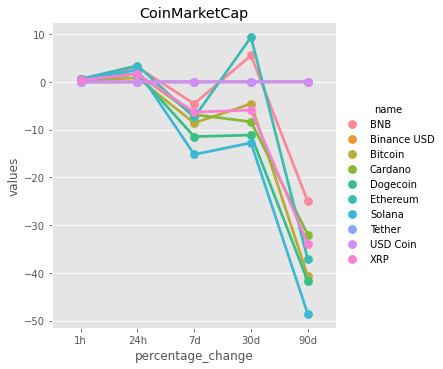

In [19]:
sn.catplot(x='percentage_change', y='values', hue='name', data=GroupedCoinMarketCap, kind='point')
plt.title("CoinMarketCap")

In [20]:
#BNB
BNB = GroupedCoinMarketCap[GroupedCoinMarketCap["name"] == "BNB"]
BNB

,name,percentage_change,values
0,BNB,1h,0.64211
1,BNB,24h,3.08379
2,BNB,7d,-4.57758
3,BNB,30d,5.56718
4,BNB,90d,-25.05269


<AxesSubplot:xlabel='percentage_change', ylabel='values'>

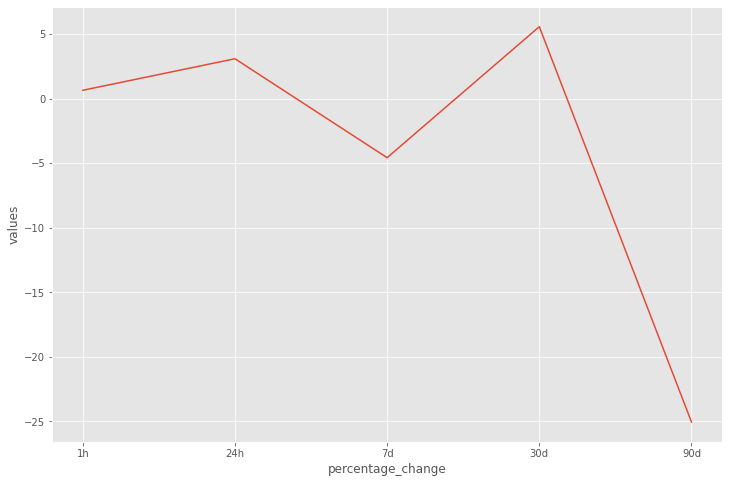

In [21]:
sn.lineplot(x = "percentage_change", y ="values", data = BNB)